* code working => rotate in 1D
* use 2D to train model
* normalise everything (to have equal weight) => ask because something goes wrong
* read about CNN => interprete the filters
* calculate correlation function (not for all functions)
* not use all lambdas => use in between to check
* Q ~ $\frac{2\pi}{l}$, q ~ $ \lambda_0$ => inelastic scattering

In [1]:
#Should be version 3.6.9
from platform import python_version
print('Currently using Python',python_version())

Currently using Python 3.6.9


In [2]:
#importing libraries
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import source_code as sc
import importlib

#path to the datafile
hdf5_path = 'data/dataset.hdf5'

dir(sc)[:6]

['AnalyseSimulation',
 'GetHydroSamples',
 'GetRandomSamples',
 'MultipleAnalysis',
 'RandomRotateSamples',
 'ReadFile']

In [3]:
x_train, y_train = sc.ReadFile(hdf5_path,split=False)

In [4]:
#print('> SHAPE OF XTEST: ',x_test.shape)
print('> SHAPE OF XTRAIN: ',x_train.shape)
#print('> SHAPE OF YTEST: ',y_test.shape)
print('> SHAPE OF YTRAIN: ',y_train.shape)

> SHAPE OF XTRAIN:  (25600, 32, 32, 32, 3)
> SHAPE OF YTRAIN:  (25600,)


In [5]:
importlib.reload(sc)
x_train = sc.Scale(x_train)

In [6]:
#Something wrong with the scaling
print('> MEAN: ',np.mean(x_train,axis=(0,1,2,3)))
print('> STDev: ',np.std(x_train,axis=(0,1,2,3)))

> MEAN:  [0.16103153 0.16       0.16006407]
> STDev:  [0.9831429 1.1313708 1.1313862]


In [7]:
sample = x_train[50]

In [8]:
sample

array([[[[0.51835567, 4.5026584 , 4.7884164 ],
         [0.6579456 , 4.3771257 , 4.945089  ],
         [0.13447861, 4.5222383 , 4.744265  ],
         ...,
         [0.57578367, 4.4116325 , 4.940638  ],
         [0.6250659 , 4.4154935 , 4.7626305 ],
         [0.18437132, 4.5586824 , 4.7395473 ]],

        [[0.6567258 , 4.413365  , 4.740665  ],
         [0.4493933 , 4.278449  , 4.8467684 ],
         [0.7263034 , 4.391565  , 4.8048906 ],
         ...,
         [0.29804733, 4.518844  , 4.8032007 ],
         [0.40359518, 4.407609  , 4.700238  ],
         [0.45227292, 4.440751  , 4.8373423 ]],

        [[0.21915583, 4.710074  , 4.8001823 ],
         [0.10797764, 4.8476067 , 4.503064  ],
         [0.5689638 , 4.4429927 , 4.7458982 ],
         ...,
         [0.3829871 , 4.4337583 , 4.7986546 ],
         [0.40646416, 4.604765  , 4.845804  ],
         [0.43028072, 4.45577   , 4.796735  ]],

        ...,

        [[0.33376625, 4.6001263 , 4.766059  ],
         [0.54813826, 4.532583  , 4.865554  ]

In [9]:
test=np.flip(sample)

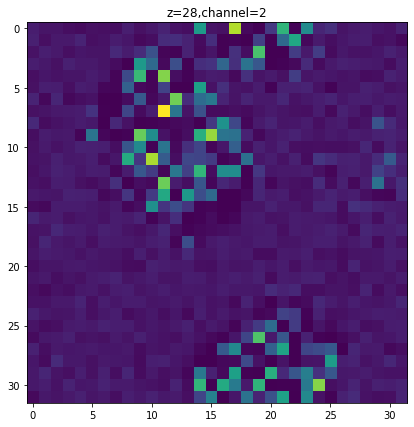

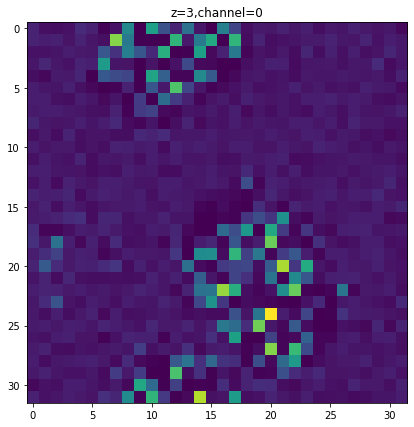

In [10]:
sc.TwoDimHeatmap(test,z=28,c=2)
sc.TwoDimHeatmap(sample,z=3,c=0)

In [11]:
x_train.shape[0]

25600

In [12]:
res, vec = sc.RandomRotateSamples(x_train)

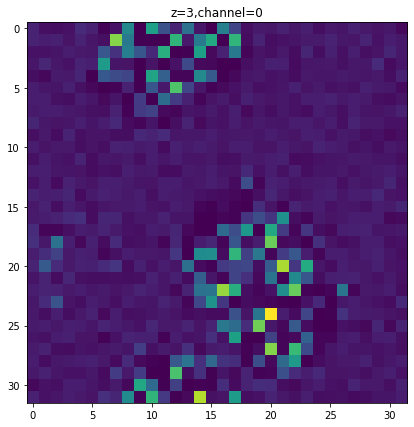

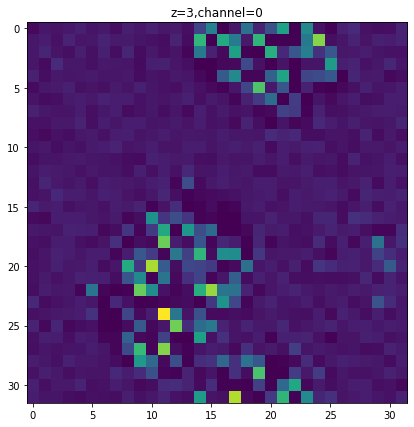

In [13]:
#proof that sample is randomly rotated

sc.TwoDimHeatmap(sample,z=3,c=0)
sc.TwoDimHeatmap(res[50],z=3,c=0)\

In [14]:
res[50].shape

(32, 32, 32, 3)